In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

## Get Benchmark Results

The datafiles can either be generate yourself by running the benchmark using [1_run_benchmark.ipynb](1_run_benchmark.ipynb), or by downloading results from an existing benchmark:

```
wget -nc 'https://cleanlab-public.s3.amazonaws.com/ActiveLearning/Benchmark/SingleAnnotator/results.tar.gz'
tar -xf results.tar.gz results/
```

In [2]:
def compute_std_dev(accuracy):
    def compute_std_dev_ind(accs):
        mean = np.mean(accs)
        std_dev = np.std(accs)
        return np.array([mean - std_dev, mean + std_dev])

    std_dev = np.apply_along_axis(compute_std_dev_ind, 0, accuracy)
    return std_dev

In [3]:
methods = [
    "random",
    "entropy",
    "crowdlab",
]

In [4]:
method_name_map = {
    "random": "Random",
    "entropy": "Entropy",
    "crowdlab": "ActiveLab",
}

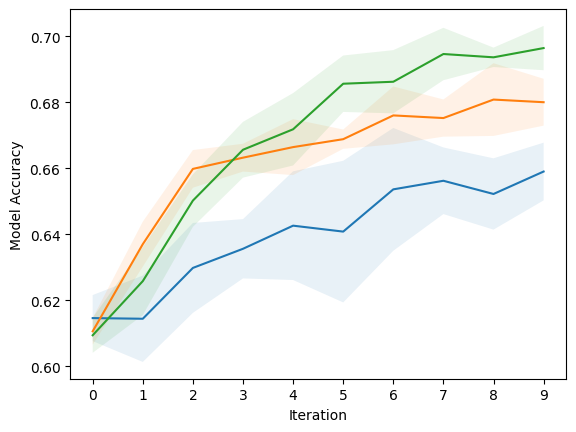

In [5]:
for method in methods:
    model_accuracy = np.array([np.load(f"results/{f}") for f in os.listdir(f"results/") if ".npy" in f and f.startswith(method)])
    model_accuracy_std = compute_std_dev(model_accuracy)

    plt.plot(range(model_accuracy.shape[1]), np.mean(model_accuracy, axis=0), label=method_name_map[method])
    plt.fill_between(range(model_accuracy.shape[1]), model_accuracy_std[0], model_accuracy_std[1], alpha=0.1)
    
# plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xlabel("Iteration")
plt.ylabel("Model Accuracy")
plt.xticks(range(model_accuracy.shape[1]))
# plt.title("Model Accuracy for Single Label Benchmark")

plt.savefig("benchmark_graphs/single_label.pdf", bbox_inches = "tight")
plt.savefig("benchmark_graphs/single_label.png", bbox_inches = "tight")

plt.show()

In [6]:
%%capture

fig = plt.figure("Line plot")
legend_fig = plt.figure("Legend plot")
ax = fig.add_subplot()

random = ax.barh(1, 1, 1) 
entropy = ax.barh(1, 1, 1) 
crowdlab = ax.barh(1, 1, 1) 

legend_fig.legend(
    [random, entropy, crowdlab], 
    ["Random", "Entropy", "ActiveLab"],
    loc="center", 
    ncol=1)

legend_fig.set_size_inches(2.5, 4.5)
legend_fig.savefig("benchmark_graphs/single_label_legend.pdf")
legend_fig.savefig("benchmark_graphs/single_label_legend.png")